Comp-551 A3 
</br>
We divide the prediction of handwriten digits and letters into two parts. Here is the letter prediction part.

In [ ]:
! gdown https://drive.google.com/uc?id=1AbxjCBByF-xGV3c7FJ1ztZC1HO0O0uJ0

Downloading...
From: https://drive.google.com/uc?id=1AbxjCBByF-xGV3c7FJ1ztZC1HO0O0uJ0
To: /content/kaggle.json
100% 66.0/66.0 [00:00<00:00, 58.6kB/s]


In [ ]:
! pip install kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
! kaggle competitions download -c comp-551-fall-2021
! unzip images_l.pkl.zip
! unzip images_test.pkl.zip
! unzip images_ul.pkl.zip
! unzip labels_l.pkl.zip

  0% 0.00/141k [00:00<?, ?B/s]
100% 141k/141k [00:00<00:00, 51.2MB/s]
 88% 87.0M/99.0M [00:00<00:00, 197MB/s]
100% 99.0M/99.0M [00:00<00:00, 223MB/s]
 88% 174M/198M [00:00<00:00, 207MB/s]
100% 198M/198M [00:01<00:00, 199MB/s]
 91% 179M/197M [00:00<00:00, 192MB/s]
100% 197M/197M [00:01<00:00, 196MB/s]
Archive:  images_l.pkl.zip
  inflating: images_l.pkl            
Archive:  images_test.pkl.zip
  inflating: images_test.pkl         
Archive:  images_ul.pkl.zip
  inflating: images_ul.pkl           
Archive:  labels_l.pkl.zip
  inflating: labels_l.pkl            


In [ ]:
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU, ZeroPadding2D,Convolution2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Nadam, Adam, SGD
from keras.applications.vgg16 import VGG16
from keras.applications.densenet import DenseNet169
from keras.applications.resnet import ResNet152, ResNet101, ResNet50
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from google.colab import drive
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras import layers, regularizers, Input
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau
from keras import optimizers

In [ ]:
# Image data for training (30,000 sample, each sample is a 56x56 image)
# train_labels = pd.read_csv('train_max_y.csv')
# train_images = pd.read_pickle('train_max_x')
# test_images = pd.read_pickle('test_max_x')
with open("images_l.pkl", 'rb') as f:
    # load into as a numpy array
    train_labelled_data = pickle.load(f)
# Test images. The prediction corresponding to these images should be uploaded. (15,000 samples)
with open("images_test.pkl", 'rb') as f:
    test_data = pickle.load(f)
# Labels for training (30,000 rows, each row is a size 36 binary vector, which is the label to the corresponding image)
with open("labels_l.pkl", 'rb') as f:
    train_labelled_y = pickle.load(f)
# Additional images that can be used for training the classifier.
# Labels for these images are not provided. (30,000 samples, where each sample is a 56x56 image)
with open("images_ul.pkl", 'rb') as f:
    train_unlabelled_x = pickle.load(f)

# process 

add predicted labels for the unlabel dataset

In [ ]:
# load process data
! gdown https://drive.google.com/uc?id=1wyUpGYONbWRjdaLgeiEH2ryqm_kMOMF_
! gdown https://drive.google.com/uc?id=1tFt0ddczfNPmq8IUNnZ8ifGUbgzP9DxU
! gdown https://drive.google.com/uc?id=1bOq70mP5ghxfiFtbK3rTbPDcefkxgyQx
! gdown https://drive.google.com/uc?id=1oSJM0BtYu_hiJ7mkSNphJLAmBVnznO4o

Downloading...
From: https://drive.google.com/uc?id=1wyUpGYONbWRjdaLgeiEH2ryqm_kMOMF_
To: /content/processed_train_set.csv
100% 386M/386M [00:01<00:00, 235MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tFt0ddczfNPmq8IUNnZ8ifGUbgzP9DxU
To: /content/processed_test_set.csv
100% 193M/193M [00:00<00:00, 202MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bOq70mP5ghxfiFtbK3rTbPDcefkxgyQx
To: /content/processed_ul_train_set.csv
100% 386M/386M [00:01<00:00, 197MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oSJM0BtYu_hiJ7mkSNphJLAmBVnznO4o
To: /content/ul_train_label.csv
100% 2.16M/2.16M [00:00<00:00, 70.9MB/s]


# letter

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 56, 56, 56)        560       
                                                                 
 conv2d_49 (Conv2D)          (None, 56, 56, 56)        28280     
                                                                 
 batch_normalization_30 (Bat  (None, 56, 56, 56)       224       
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 28, 28, 56)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 28, 28, 56)        0         
                                                                 
 conv2d_50 (Conv2D)          (None, 28, 28, 128)      

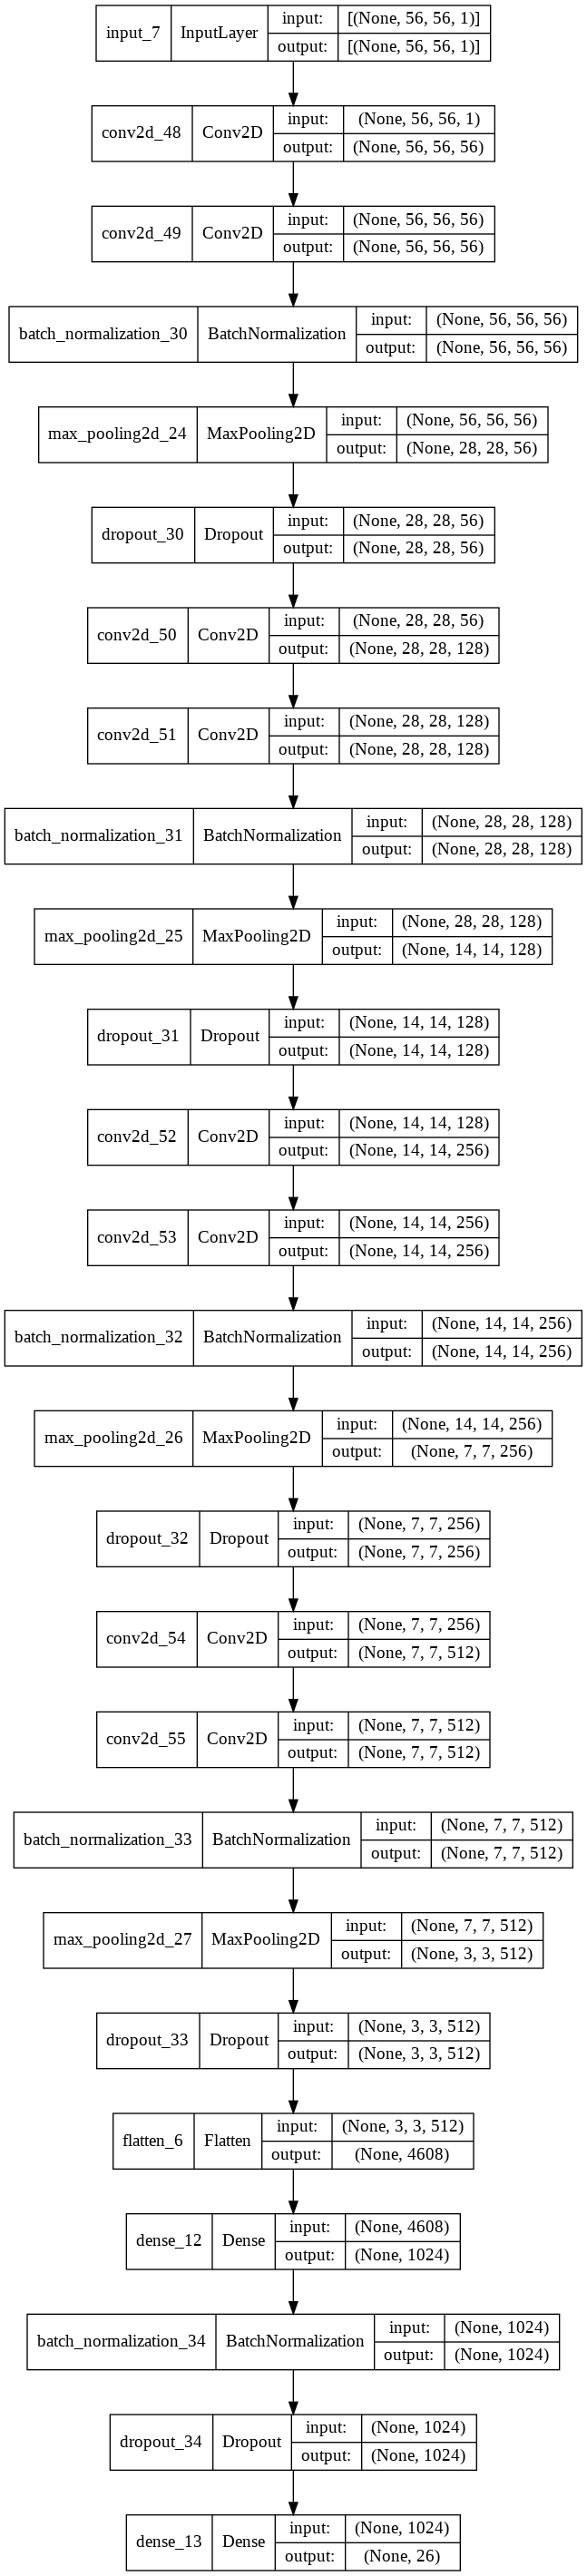

In [47]:
def cnn2():
  model = Sequential()
  model.add(Input(shape=(56, 56, 1)))
  model.add(Conv2D(filters= 56, kernel_size=(3,3), padding='Same', activation='relu'))
  model.add(Conv2D(filters= 56, kernel_size=(3,3), padding='Same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Dropout(0.6))

  model.add(Conv2D(filters= 128, kernel_size=(3,3), padding='Same', activation='relu'))
  model.add(Conv2D(filters= 128, kernel_size=(3,3), padding='Same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Dropout(0.6))

  model.add(Conv2D(filters= 256, kernel_size=(3,3), padding='Same', activation='relu'))
  model.add(Conv2D(filters= 256, kernel_size=(3,3), padding='Same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Dropout(0.6))

  model.add(Conv2D(filters= 512, kernel_size=(3,3), padding='Same', activation='relu'))
  model.add(Conv2D(filters= 512, kernel_size=(3,3), padding='Same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Dropout(0.6))

  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.6))
  model.add(Dense(26, activation='softmax'))
  model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
  return model
model2=cnn2()
model2.summary()
tf.keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
train_unlabelled_y=np.array(pd.DataFrame(pd.read_csv('ul_train_label.csv')))

In [ ]:
train_data = np.concatenate((train_labelled_data,train_unlabelled_x),axis=0)
train_label = np.concatenate((train_labelled_y,train_unlabelled_y),axis=0)

In [ ]:
letter_train = train_data.reshape(-1, 56, 56, 1)
# letter_train /= 255
letter_train_label = train_label[:, 10:]
x_train2 = letter_train[:59000,:,:,:]
y_train2 = letter_train_label[:59000,:]
x_valid2 = letter_train[59000:,:,:,:]
y_valid2 = letter_train_label[59000:,:]

In [ ]:
for i in range(30):
  print('Trail: ',i)
  history = model2.fit(x_train2, y_train2, batch_size=100, epochs=1, verbose=1)
  score = model2.evaluate(x_valid2, y_valid2, verbose=1)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  model2.save('Model2_2_SP_{}'.format(i))

Trail:  0
32/32 [==============================] - 1s 14ms/step - loss: 3.4767 - accuracy: 0.0910
Test loss: 3.476746082305908
Test accuracy: 0.09099999815225601
INFO:tensorflow:Assets written to: VGG16_2_SP_0/assets
Trail:  1
32/32 [==============================] - 0s 8ms/step - loss: 3.1796 - accuracy: 0.1820
Test loss: 3.17960524559021
Test accuracy: 0.18199999630451202
INFO:tensorflow:Assets written to: VGG16_2_SP_1/assets
Trail:  2
32/32 [==============================] - 0s 7ms/step - loss: 1.3187 - accuracy: 0.5910
Test loss: 1.3186821937561035
Test accuracy: 0.5910000205039978
INFO:tensorflow:Assets written to: VGG16_2_SP_2/assets
Trail:  3
32/32 [==============================] - 0s 7ms/step - loss: 0.5590 - accuracy: 0.8300
Test loss: 0.5590320825576782
Test accuracy: 0.8299999833106995
INFO:tensorflow:Assets written to: VGG16_2_SP_3/assets
Trail:  4
32/32 [==============================] - 0s 7ms/step - loss: 0.3738 - accuracy: 0.8880
Test loss: 0.3737865090370178
Test accu

In [ ]:
model2 = keras.models.load_model('Model2_2_SP_5')

In [ ]:
pickle.dump(model2, open('model2_valid_98.05_3.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://95e79a60-8906-4edb-a783-2e7aa1319ef0/assets


In [ ]:
with open("images_test.pkl",'rb') as f:
  x_test_data = pickle.load(f)
x_test = x_test_data.reshape(-1,56,56,1)

In [ ]:
result2 = model2.predict(x_test, verbose=1)
result2 = np.argmax(result2, axis = 1)